In [2]:
import numpy as np
from IPython.display import display, Math, HTML
import pandas as pd
import random
import scipy.io as sio
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [6]:
# 2.
# a) Write the information as a matrix
print("a)")
X = np.array([[2, 2, 0.5, 0, 0],[1, 2, 0.5, 1, 0],[1, 0, 1, 3, 3]])
print("X = ", X)

# b) matrix-vector multiplication that calculates expenses on every breakfast meal
print("b)")
w1 = np.array([1, 0.2, 0.5, 0.1, 0.4])
display(Math(rf'Xw1 = '),X@w1)

# c) 1st row of X + 2nd row of X
print("c)")
w2 = np.array([1, 1, 0])
display(Math(rf'w2^\top X = '),w2@X)

# d) total expenses to make three portions of every meal
print("d)")
w3 = np.array([1, 1, 1])
display(Math(rf'3 * w2^\top Xw1 = '),3 * w3@X@w1)

a)
X =  [[2.  2.  0.5 0.  0. ]
 [1.  2.  0.5 1.  0. ]
 [1.  0.  1.  3.  3. ]]
b)


<IPython.core.display.Math object>

array([2.65, 1.75, 3.  ])

c)


<IPython.core.display.Math object>

array([3., 4., 1., 1., 0.])

d)


<IPython.core.display.Math object>

22.200000000000003

In [7]:
# 3.
X = np.array([[4, 1, 1,], [-3, 2, 2], [1, -3, 2], [5, 1, 3]])

# a) Check Xw = y
print("a)")
y = np.array([9, 7, 1, 16])
w = np.array([1, 2, 3])
print("y = ", y)
display(Math('Xw = '), X@w)

# b)
print("b)")
Id = np.eye(4)
for i in [1, 2, 3, 4]:
    print(Id[i-1]@X == X[i-1])

# c)
print("c)")
i, j = random.sample(range(1, 5), 2)
w3 = np.zeros(4)
w3[i-1] = 3
w3[j-1] = 7
print(f'3 times row{i} of X plus 7 times row{j} of X is')
display(Math(rf'w3^\top X = '), w3@X)

# d)
print("d)")
Id = np.eye(3)
for i in [1, 2, 3]:
    print(X@Id[i-1] == X[:, i-1])

# e) 10 * col2 - col1
print("e)")
w5 = np.array([-1, 10, 0])
display(Math('Xw5 = '), X@w5)

# f) XB
print("f)")
B = np.array([[0, 1, -1, 1], [2, 3, 1, 1], [0, 2, -2, 2]])
display(Math('XB = '), np.dot(X, B))

a)
y =  [ 9  7  1 16]


<IPython.core.display.Math object>

array([ 9,  7,  1, 16])

b)
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
c)
3 times row2 of X plus 7 times row1 of X is


<IPython.core.display.Math object>

array([19., 13., 13.])

d)
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
e)


<IPython.core.display.Math object>

array([  6,  23, -31,   5])

f)


<IPython.core.display.Math object>

array([[  2,   9,  -5,   7],
       [  4,   7,   1,   3],
       [ -6,  -4,  -8,   2],
       [  2,  14, -10,  12]])

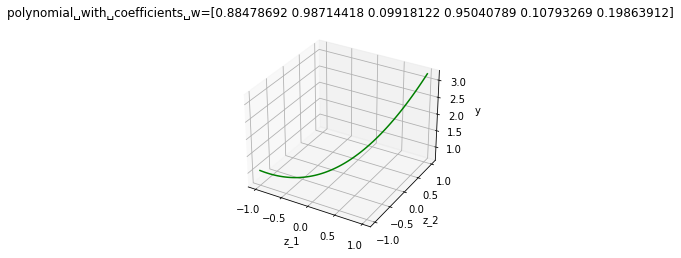

In [13]:
# n = number of points
# z = points where polynomial is evaluated
# p = array to store the values of the interpolated polynomials n = 100
n = 100
z_1 = np.linspace(-1, 1, n)
z_2 = np.linspace(-1, 1, n)
w_size = 6
w = np.random.rand(w_size)
X = np.zeros((n,w_size))

# generate X-matrix
for row in range(n):
    for col in range(w_size):
        if col < 3:
            X[row][col] = z_1[row] ** col
        elif col == 3:
            X[row][col] = z_1[row] * z_2[row]
        else:
            X[row][col] = z_2[row] ** (col-3)

# TODO: evaluate polynomial at all points z, # and store the result in p
# do NOT use a loop for this
p = X@w

# plot the datapoints and the best-fit polynomials

fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.plot3D(z_1,z_2, p, 'green')
ax.set_xlabel("z_1")
ax.set_ylabel("z_2")
ax.set_zlabel("y")
ax.set_title('polynomial␣with␣coefficients␣w=%s'%w)
plt.show()